**README**

This notebook includes code for the first round of visualisation trials. 

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from wordcloud import *
from functools import reduce
pd.set_option('display.max_rows', 200)
from statsmodels.graphics.mosaicplot import mosaic

path = '/Users/laurentfintoni/Desktop/University/COURSE DOCS/YEAR 2/EPUB/PROJECT/EPDS/'

#complete DFs
rhz_artworks = pd.read_pickle(path+'Rhizome_data/rhizome_artworks_extra.pkl')
rhz_artists = pd.read_pickle(path+'Rhizome_data/rhizome_artists_extra.pkl')
moma_artists = pd.read_pickle(path+'MOMA_data/pickle/MoMAArtists.pkl')
moma_artworks = pd.read_pickle(path+'MOMA_data/pickle/MoMAartworks.pkl')
moma_artworks_old =  pd.read_pickle(path+'MOMA_data/pickle/old_artworks.pkl')
moma_artworks_new =  pd.read_pickle(path+'MOMA_data/pickle/new_artworks.pkl')       
#load department DFs
moma_arch_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_cont.pkl')
moma_arch_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_mod.pkl')
moma_design_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_cont.pkl')
moma_design_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/architecture_design_img_mod.pkl')
moma_draw_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_cont.pkl')
moma_draw_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/draws_prints_mod.pkl')
moma_films_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/films_cont.pkl')
moma_films_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/films_mod.pkl')
moma_fluxus_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_cont.pkl')
moma_fluxus_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/fluxus_mod.pkl')
moma_media_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_cont.pkl')
moma_media_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/media_perf_mod.pkl')
moma_paint_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_cont.pkl')
moma_paint_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/paint_sculp_mod.pkl')
moma_photo_cont = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_cont.pkl')
moma_photo_mod = pd.read_pickle(path+'MOMA_data/pickle/departments/photo_mod.pkl')

In [80]:
rhz_artworks

,ID,URL,Title,Artist,dateAcquired,dateCreated,Nationality,Gender
0,879,https://artbase.rhizome.org/wiki/Q2423,ZUR FARBENLEHRE (THEORY OF COLOURS),Steven Jones,2007,2007,British,M
1,1020,https://artbase.rhizome.org/wiki/Q4089,Zones de Convergence,cicero,2005,2005,missing,missing
2,"243, 701",https://artbase.rhizome.org/wiki/Q1475,Zombie and Mummy,"Dragan Espenschied, Olia Lialina",2004,2002,"German, Russian","M, F"
3,312,https://artbase.rhizome.org/wiki/Q4374,"Zaira, City of Memories",Gokcen Erguven,2004,2004,Turkish,F
4,920,https://artbase.rhizome.org/wiki/Q3972,Z_G [zeitgeist gestalten],Tiago Borges,2008,2007,Angolan,M
...,...,...,...,...,...,...,...,...
2265,1075,https://artbase.rhizome.org/wiki/Q4358,1999,joan escofet,2001,2000,missing,missing
2266,771,https://artbase.rhizome.org/wiki/Q3761,1969,Rhea Myers,2004,2004,British,F
2267,859,https://artbase.rhizome.org/wiki/Q2283,1953,Skye Thorstenson,2003,2002,missing,M
2268,481,https://artbase.rhizome.org/wiki/Q2511,160,Katie Lips,2005,2005,British,F


**CATEGORICAL VALUE OVER TIME WITHIN ONE OR TWO DATASET** 
- Acquisitions over time by gender within MoMA and Rhizome
- Separate and joint comparisons 

In [ ]:
#RHIZOME
#filter dataset by cat value
rhizome_male_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
#count cat values based on time column
rhizome_male_artworks = rhizome_male_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
rhizome_female_artworks = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks = rhizome_female_artworks['dateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
#combine the two based on date 
rhizome_gender_artworks = pd.merge(rhizome_male_artworks, rhizome_female_artworks, left_on='Date Acquired', right_on='Date Acquired')
#drop values w/ no date
rhizome_gender_artworks = rhizome_gender_artworks.loc[rhizome_gender_artworks['Date Acquired'] != '0']
#arrange by date 
rhizome_gender_artworks = rhizome_gender_artworks.sort_values(by='Date Acquired').reset_index(drop=True)
rhizome_gender_artworks

In [ ]:
#SAME BUT WITH CREATION
#filter dataset by cat value
rhizome_male_artworks_2 = rhz_artworks.loc[rhz_artworks['Gender'] == 'M']
#count cat values based on time column
rhizome_male_artworks_2 = rhizome_male_artworks_2['dateCreated'].value_counts().rename_axis('Date Created').reset_index(name='Male Artists')
rhizome_female_artworks_2 = rhz_artworks.loc[rhz_artworks['Gender'] == 'F']
rhizome_female_artworks_2 = rhizome_female_artworks_2['dateCreated'].value_counts().rename_axis('Date Created').reset_index(name='Female Artists') 
#combine the two based on date 
rhizome_gender_artworks_2 = pd.merge(rhizome_male_artworks_2, rhizome_female_artworks_2, left_on='Date Created', right_on='Date Created')
#drop values w/ no date
rhizome_gender_artworks_2 = rhizome_gender_artworks_2.loc[rhizome_gender_artworks_2['Date Created'] != '0']
#arrange by date 
rhizome_gender_artworks_2 = rhizome_gender_artworks_2.sort_values(by='Date Created').reset_index(drop=True)
rhizome_gender_artworks_2

In [230]:
#Dual line plot for Acquisition
fig = px.line(rhizome_gender_artworks, x='Date Acquired', y=['Male Artists', 'Female Artists'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='Rhizome Acquisitions by Gender', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.show()

In [231]:
#Dual line plot for Creation
fig = px.line(rhizome_gender_artworks_2, x='Date Created', y=['Male Artists', 'Female Artists'], markers=True, labels={'Date Created': 'Date of Creation', 'value': 'Total Created Artworks', 'variable': 'Gender'}, title='Rhizome Artwork Creations by Gender', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852"})
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode="x unified")
fig.show()

In [ ]:
#MoMA
moma_old_artworks_male = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'M']
moma_old_artworks_male.loc[:,'DateAcquired'] = moma_old_artworks_male['DateAcquired'].where((moma_old_artworks_male['DateAcquired'].str.len() <= 4), moma_old_artworks_male['DateAcquired'].str[0:4])
moma_old_artworks_male = moma_old_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_old_artworks_female = moma_artworks_old.loc[moma_artworks_old['Gender'] == 'F']
moma_old_artworks_female.loc[:,'DateAcquired'] = moma_old_artworks_female['DateAcquired'].where((moma_old_artworks_female['DateAcquired'].str.len() <= 4), moma_old_artworks_female['DateAcquired'].str[0:4])
moma_old_artworks_female = moma_old_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_old_gender_artworks = pd.merge(moma_old_artworks_male, moma_old_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.loc[moma_old_gender_artworks['Date Acquired'] != 'nan']
moma_old_gender_artworks = moma_old_gender_artworks.sort_values(by='Date Acquired')
moma_old_gender_artworks = moma_old_gender_artworks.reset_index(drop=True)
moma_old_gender_artworks = moma_old_gender_artworks.drop(index=0, axis=0)
moma_old_gender_artworks

In [ ]:
moma_new_artworks_male = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'M']
moma_new_artworks_male.loc[:,'DateAcquired'] = moma_new_artworks_male['DateAcquired'].where((moma_new_artworks_male['DateAcquired'].str.len() <= 4), moma_new_artworks_male['DateAcquired'].str[0:4])
moma_new_artworks_male = moma_new_artworks_male['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Male Artists')
moma_new_artworks_female = moma_artworks_new.loc[moma_artworks_new['Gender'] == 'F']
moma_new_artworks_female.loc[:,'DateAcquired'] = moma_new_artworks_female['DateAcquired'].where((moma_new_artworks_female['DateAcquired'].str.len() <= 4), moma_new_artworks_female['DateAcquired'].str[0:4])
moma_new_artworks_female = moma_new_artworks_female['DateAcquired'].value_counts().rename_axis('Date Acquired').reset_index(name='Female Artists') 
moma_new_gender_artworks = pd.merge(moma_new_artworks_male, moma_new_artworks_female, left_on='Date Acquired', right_on='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.loc[moma_new_gender_artworks['Date Acquired'] != 'nan']
moma_new_gender_artworks = moma_new_gender_artworks.sort_values(by='Date Acquired')
moma_new_gender_artworks = moma_new_gender_artworks.reset_index(drop=True)
moma_new_gender_artworks = moma_new_gender_artworks.drop(index=0, axis=0)
moma_new_gender_artworks

In [234]:
#Dual line plot 
fig = px.line(moma_old_gender_artworks, x='Date Acquired', y=['Male Artists', 'Female Artists'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Acquisitions by Gender for Artworks Created Before 1980', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852"})
fig.update_traces(hovertemplate=None)
fig.update_layout(xaxis = dict(tickmode = 'array', tickvals = [1934, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], ticktext = ['1934', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']), hovermode="x unified")
fig.show()

In [237]:
#Dual line plot 
fig = px.line(moma_new_gender_artworks, x='Date Acquired', y=['Male Artists', 'Female Artists'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA Acquisitions by Gender for Artworks Created After 1980', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852"})
fig.update_traces(hovertemplate=None)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1981, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
        ticktext = ['1981', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020']
    ), hovermode="x unified"
)
fig.show()

In [323]:
#MoMA and Rhizome
moma_line_comp = moma_new_gender_artworks[19:40].copy()
moma_line_comp = moma_line_comp.rename({'Male Artists': 'MoMA Male Artists', 'Female Artists': 'MoMA Female Artists'}, axis=1)
moma_line_comp['Date Acquired'] = moma_line_comp['Date Acquired'].astype('int')
rhizome_line_comp = rhizome_gender_artworks.copy()
rhizome_line_comp = rhizome_line_comp.rename({'Male Artists': 'Rhizome Male Artists', 'Female Artists': 'Rhizome Female Artists'}, axis=1)
rhizome_line_comp['Date Acquired'] = rhizome_line_comp['Date Acquired'].astype('int')
rhizome_moma_lineplot = moma_line_comp.merge(rhizome_line_comp, on='Date Acquired', how='outer')
rhizome_moma_lineplot = rhizome_moma_lineplot.fillna(0)
rhizome_moma_lineplot = rhizome_moma_lineplot.astype('int')
rhizome_moma_lineplot = rhizome_moma_lineplot.rename({'MoMA Male Artists':'MoMA Male',	'MoMA Female Artists':'MoMA Female', 'Rhizome Male Artists':'Rhizome Male',	'Rhizome Female Artists':'Rhizome Female'}, axis=1)
rhizome_moma_lineplot

,Date Acquired,MoMA Male,MoMA Female,Rhizome Male,Rhizome Female
0,2000,560,177,4,4
1,2001,475,147,163,70
2,2002,344,120,165,72
3,2003,226,58,103,24
4,2004,258,170,167,76
5,2005,2248,792,173,63
6,2006,900,246,146,55
7,2007,843,221,180,84
8,2008,637,1212,91,31
9,2009,453,262,61,7


In [325]:
#Dual line plot 
fig = px.line(rhizome_moma_lineplot, x='Date Acquired', y=['MoMA Male',	'MoMA Female',	'Rhizome Male',	'Rhizome Female'], markers=True, labels={'Date Acquired': 'Date of Acquisition', 'value': 'Total Acquisitions', 'variable': 'Gender'}, title='MoMA & Rhizome Acquisitions by Gender', color_discrete_map={"Male Artists": "#456987","Female Artists": "#147852"})
fig.update_traces(hovertemplate=None, hoverinfo='name+y')
fig.update_layout(hovermode="x unified")
fig.show()

**ORDINAL VALUE REPRESENTATION WITHIN ONE DATASET** 
- Date of acquisition within MoMA / Rhizome

In [ ]:
#create DF w/ year and counts 
moma_acquired = moma_artworks['DateAcquired'].value_counts().rename_axis('year').reset_index(name='counts')
moma_acquired = moma_acquired.sort_values(by='year', ascending=True).reset_index(drop=True)
moma_acquired['year'] = moma_acquired['year'].str[0:4]
moma_acquired = moma_acquired.loc[moma_acquired['year'] != 'nan']
moma_acquired = moma_acquired.groupby('year', axis=0).sum()

In [240]:
fig = px.line(moma_acquired, x=moma_acquired.index, y='counts', markers=True, labels={'counts': 'Total Acquisitions', 'year': 'Date of Acquisition'}, title='MoMA Acquisitions Over Time', color_discrete_map={})
fig.update_traces(hovertemplate=None)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1934, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
        ticktext = ['1934', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']
    ), hovermode="x"
)
fig.show()

**COMPARE TWO NUMERICAL VALUES AGAINST EACH OTHER** 
- e.g old moma v new moma 

In [111]:
#copy and add before/after value
moma_before = moma_artworks_old.copy()
moma_before['Period'] = 'Contemporary'
moma_after = moma_artworks_new.copy()
moma_after['Period'] = 'Modern'

#merge 
frames = [moma_before, moma_after]
moma_artworks_two_periods = pd.concat(frames)

In [154]:
#count occurrences of department values before and after 1980
before_n = moma_before['Department'].value_counts().rename_axis('Department').reset_index(name='Contemporary')
after_n = moma_after['Department'].value_counts().rename_axis('Department').reset_index(name='Modern')
moma_1980_x_dep = pd.merge(before_n, after_n, left_on='Department', right_on='Department')
moma_1980_x_dep

,Department,Contemporary,Modern
0,Drawings & Prints,54384,21733
1,Photography,26705,5193
2,Architecture & Design,15983,3747
3,Painting & Sculpture,2989,920
4,Fluxus Collection,1916,103
5,Film,1041,454
6,Media and Performance,949,2004


In [283]:
department= moma_1980_x_dep['Department']

fig = go.Figure(data=[
    go.Bar(name='Contemporary', x=department, y=moma_1980_x_dep['Contemporary'], text=moma_1980_x_dep['Contemporary'], textposition='auto', marker_color="#456987"),
    go.Bar(name='Modern', x=department, y=moma_1980_x_dep['Modern'], text=moma_1980_x_dep['Modern'], textposition='auto', marker_color="#147852"), 
])
# Change the bar mode to  stack or group
fig.update_traces(hoverinfo='name+y')
fig.update_layout(barmode='stack', title='Composition of MoMA Collection by Department and Time Period', xaxis={'categoryorder':'array', 'categoryarray':['Drawings & Prints','Photography','Architecture & Design','Painting & Sculpture', 'Media and Performance', 'Fluxus Collection', 'Film']})
fig.show()

In [191]:
#MOMA: how the composition of the collection (by gender) changes before and after 1980 (old vs new)
old_gender = moma_before['Gender'].value_counts().rename_axis('Gender').reset_index(name='Old')
new_gender = moma_after['Gender'].value_counts().rename_axis('Gender').reset_index(name='New')
moma_gender_count = pd.merge(old_gender, new_gender, left_on='Gender', right_on='Gender')
moma_gender_count = moma_gender_count.set_index('Gender')
#choose only M, F, missing 
moma_gender_count = moma_gender_count[0:3]
#transpose columns and index to have triple stack 
moma_gender_count = moma_gender_count.transpose()
moma_gender_count

Gender,M,F,missing
Old,82418,9030,7689
New,21750,8793,952


In [277]:
x = ['Contemporary', 'Modern']
fig = go.Figure(go.Bar(x=x, y=[moma_gender_count.iloc[0]['M'], 21750], name='Male', textposition='inside', text='Male'))
fig.add_trace(go.Bar(x=x, y=[9030, 8793], name='Female', textposition='inside', text='Female'))
fig.add_trace(go.Bar(x=x, y=[7689, 952], name='Missing', textposition='auto', text='Missing'))
fig.update_traces(hoverinfo='y')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title='Gender Composition of MoMA Collection by Period', height=500, width=500)
fig.show()

In [212]:
moma_gender_multiple = pd.merge(old_gender, new_gender, left_on='Gender', right_on='Gender')
moma_gender_multiple = moma_gender_multiple.set_index('Gender')
#choose only collectives
moma_gender_multiple = moma_gender_multiple[4:].reset_index()
#remove collectives w/ no gender
drops = ['missing, missing', 'missing, missing, missing', 'missing, missing, missing, missing, missing', 'missing, missing, missing, missing']
#filter by only males, only females, or mixed gender (mixed gender also includes collectives w/ at least one M or F and some missing)
moma_gender_multiple = moma_gender_multiple[moma_gender_multiple.Gender.isin(drops) == False]
moma_gender_multiple_male = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('F') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == False)]
moma_gender_multiple_female = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == False)]
moma_gender_multiple_both = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('F')== True) & (moma_gender_multiple['Gender'].str.contains('M')== True) & (moma_gender_multiple['Gender'].str.contains('missing')== False)]
moma_gender_multiple_male_missing = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == True) & (moma_gender_multiple['Gender'].str.contains('missing') == True) & (moma_gender_multiple['Gender'].str.contains('F') == False)]
moma_gender_multiple_female_missing = moma_gender_multiple[(moma_gender_multiple['Gender'].str.contains('M') == False) & (moma_gender_multiple['Gender'].str.contains('missing') == True) & (moma_gender_multiple['Gender'].str.contains('F') == True)]

In [213]:
#send filters to series 
moma_gender_multiple_both_counts = moma_gender_multiple_both.sum()
moma_gender_multiple_male_counts = moma_gender_multiple_male.sum()
moma_gender_multiple_female_counts = moma_gender_multiple_female.sum()
moma_gender_multiple_male_missing_counts = moma_gender_multiple_male_missing.sum()
moma_gender_multiple_female_missing_counts = moma_gender_multiple_female_missing.sum()
#create new DF w/ results 
moma_gender_counts_final = pd.DataFrame()
moma_gender_counts_final['Male Only'] = moma_gender_multiple_male_counts
moma_gender_counts_final['Male & Missing'] = moma_gender_multiple_male_missing_counts
moma_gender_counts_final['Female Only'] = moma_gender_multiple_female_counts
moma_gender_counts_final['Female & Missing'] = moma_gender_multiple_female_missing_counts
moma_gender_counts_final['Mixed Gender'] = moma_gender_multiple_both_counts
moma_gender_counts_final = moma_gender_counts_final.drop('Gender', axis=0)

In [214]:
moma_gender_counts_final

,Male Only,Male & Missing,Female Only,Female & Missing,Mixed Gender
Old,825,1109,29,22,893
New,107,698,144,47,671


In [310]:
import plotly.graph_objects as go

x=['Contemporary', 'Modern']
fig = go.Figure(go.Bar(x=x, y=[825, 107], name='Male Only'))
fig.add_trace(go.Bar(x=x, y=[1109, 698], name='Male & Missing'))
fig.add_trace(go.Bar(x=x, y=[29, 144], name='Female Only'))
fig.add_trace(go.Bar(x=x, y=[22, 47], name='Female & Missing'))
fig.add_trace(go.Bar(x=x, y=[893, 671], name='Mixed Gender'))
fig.update_traces(hoverinfo='y')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title='Gender Composition of Collectives in MoMA Collection by Period', height=800, width=600, hovermode='x')
fig.show()

- Moma vs Rhizome w/ sampling to even

In [356]:
moma_genders = moma_artists.copy()
moma_genders = moma_genders.sample(n=1301)
moma_genders = moma_genders.reset_index(drop=True)
moma_genders = moma_genders[['Gender']]
moma_genders = moma_genders['Gender'].value_counts().rename_axis('Gender').reset_index(name='MoMA Counts')
rhizome_genders = rhz_artists.copy()
rhizome_genders = rhizome_genders[['Gender']]
rhizome_genders = rhizome_genders['Gender'].value_counts().rename_axis('Gender').reset_index(name='Rhizome Counts')
combined = moma_genders.merge(rhizome_genders, on='Gender', how='outer')
combined = combined.fillna(0)
combined['MoMA Counts'] = combined['MoMA Counts'].astype('int')
combined


,Gender,MoMA Counts,Rhizome Counts
0,M,841,804
1,missing,257,113
2,F,203,381
3,N/B,0,1


In [371]:
Gender = ['Male', 'Female', 'Missing', 'Non Binary']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Gender,
    y=[841, 203, 257, 0],
    name='MoMA',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=Gender,
    y=[804, 381, 113, 1],
    name='Rhizome',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_traces(hoverinfo='y')
fig.update_layout(barmode='group', xaxis_tickangle=-45, width=500, title='Gender Composition of Collections with Sampling', xaxis={'categoryorder':'total descending'})
fig.show()

COMPARISON OF TWO CAT VALUES OVER MULTIPLE CAT VALUES 

In [372]:
moma_photo = moma_artworks_new[moma_artworks_new['Department'] == 'Photography']
moma_medium_male = moma_photo.loc[moma_photo['Gender'] == 'M']
moma_medium_male = moma_medium_male['Medium'].value_counts().rename_axis('Medium').reset_index(name='Male Artists')
moma_medium_female = moma_photo.loc[moma_photo['Gender'] == 'F']
moma_medium_female = moma_medium_female['Medium'].value_counts().rename_axis('Medium').reset_index(name='Female Artists')
moma_medium_pyramid = pd.merge(moma_medium_male, moma_medium_female, on='Medium', how='outer')
moma_medium_pyramid = moma_medium_pyramid.fillna('0')
moma_medium_pyramid['Male Artists'] = moma_medium_pyramid['Male Artists'].astype(int)
moma_medium_pyramid['Female Artists'] = moma_medium_pyramid['Female Artists'].astype(int)
moma_medium_pyramid = moma_medium_pyramid.reset_index(drop=True)
moma_medium_pyramid = moma_medium_pyramid.set_index('Medium')
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Page with chromogenic color print and text,125,0
Silver dye bleach print,66,39
...,...,...
Chromogenic color print (Digital exposure to Fujiflex paper),0,1
Four pigmented inkjet prints,0,1
"Silver dye bleach print, printed 2009",0,1


In [393]:
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Male Artists'] > 1]
moma_medium_pyramid = moma_medium_pyramid[moma_medium_pyramid['Female Artists'] > 1]
moma_medium_pyramid

,Male Artists,Female Artists
Medium,,
Gelatin silver print,1806,254
Chromogenic color print,648,310
Pigmented inkjet print,279,171
Silver dye bleach print,66,39
Pigmented inkjet prints,49,6
Color instant print (Polaroid),27,4
"Gelatin silver print, printed 1996",17,3
Gelatin silver prints,16,8
"Gelatin silver print, printed 2016",10,3


In [426]:
moma_medium_pyramid['Female Artists'].values

array([254, 310, 171,  39,   6,   4,   3,   8,   3,  13,   3,  12,  18,
         3,   4,   4,   2])

In [438]:
women_bins = np.array([-254, -310, -171,  -39,   -6,   -4,   -3,   -8,   -3,  -13,   -3,  -12,  -18,
         -3,   -4,   -4,   -2])
men_bins = moma_medium_pyramid['Male Artists'].values

y = moma_medium_pyramid.index

fig = go.Figure(data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )])

fig.update_layout(yaxis=go.layout.YAxis(title='Department'),
                   xaxis=go.layout.XAxis(
                       range=[-300, 2000],
                       tickvals=[-300, -250, -200, -150, -100, -50, 0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000],
                       ticktext=[300, 250, 200, 150, 100, 50, 0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000],
                       title='Number', rangemode='nonnegative'),
                   barmode='relative',
                   bargap=0.0, bargroupgap=0)

fig.show()

In [192]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = moma_medium_pyramid.index
column0 = moma_medium_pyramid['Male Artists']
column1 = moma_medium_pyramid['Female Artists']
title0 = 'Male Artists'
title1 = 'Female Artists'

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


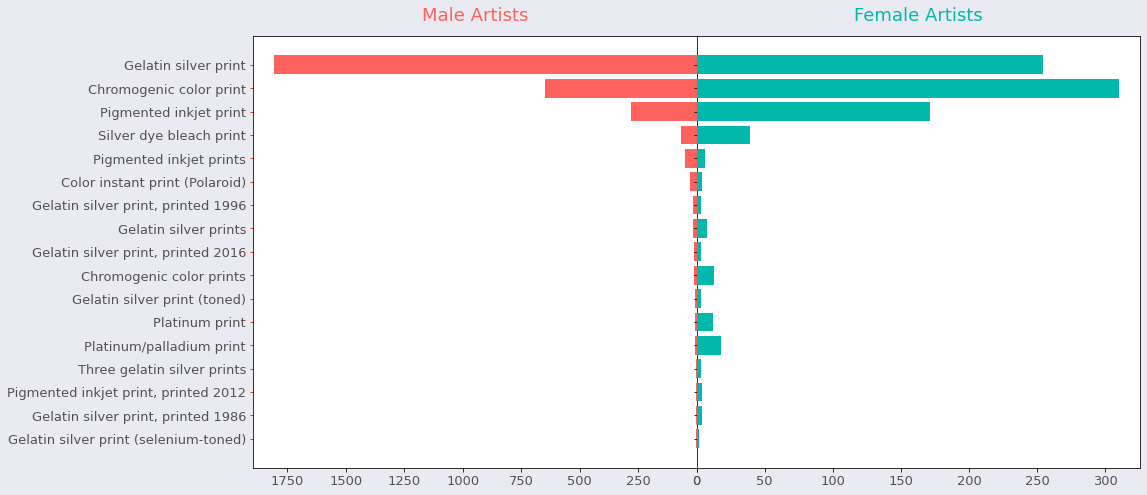

In [193]:
fig, axes = plt.subplots(figsize=(16,8), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()
axes[0].barh(index, column0, align='center', color=color_red, zorder=30)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=30)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()
axes[0].set(yticks=moma_medium_pyramid.index, yticklabels=moma_medium_pyramid.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='red') # tick color
#axes[1].set_xticks([0, 100, 200, 300, 400])
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)